In [68]:
import os
import random
from PIL import Image
import glob
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

### Generating Labels from the SAM output

In [87]:
folder_name = 'p1'

original_image = 'input_images/planetscope/'+folder_name+'/'+folder_name+'.png'
input_dir = 'input_images/planetscope/'+folder_name+'/patches/'+folder_name+'/'
output_dir = 'input_images/planetscope/'+folder_name+'/'

In [88]:
def display_images_horizontally(images, titles):
    # Create a figure with subplots
    fig, axes = plt.subplots(1, len(images))

    # Iterate over the images and display them
    for i, image in enumerate(images):
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(titles[i],fontsize=5)


    # Adjust spacing and display the figure
    plt.subplots_adjust(wspace=0.09)
    plt.show()

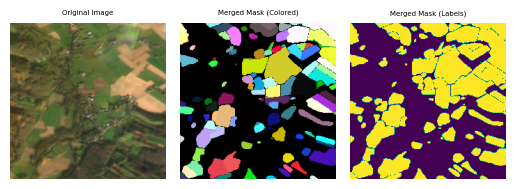

In [89]:
files = sorted(glob.glob(input_dir+'*.png'))

#Generate color sequence based on the len of files
color_sequence = []
for i in range(len(files)):
    color_sequence.append((random.randint(0,255),random.randint(0,255),random.randint(0,255)))


merged_mask_inference = np.zeros_like(np.array(Image.open(files[0])))                            
merged_mask_display = np.zeros_like(np.array(Image.open(files[0]).convert('RGB')))

# blend the images together to create a new image of same size (224,224) but with random colors
for i,file in enumerate(files):
    image = Image.open(file)

    # For Display (Colored Image)
    # convert to RGB
    img_dis = image.convert('RGB')
    #convert to numpy array
    img_dis = np.array(img_dis)
    # Add color to the mask from the color sequence only if the pixel is not black/
    # This is to avoid adding color to the black background
    img_dis[np.where((img_dis==[0,0,0]).all(axis=2))] = [0,0,0]
    img_dis[np.where((img_dis!=[0,0,0]).all(axis=2))] = color_sequence[i]
    # Convert the numpy array back to PIL image
    img_dis = Image.fromarray(img_dis)
    # Do bitwise OR operation to merge the masks but with different colors from the color sequence
    merged_mask_display = np.bitwise_or(merged_mask_display,img_dis)
    
    
    # This is for storing the labels in the same format as the original labels
    # convert to numpy array
    img = np.array(image)
    merged_mask_inference = np.bitwise_or(merged_mask_inference,img)

# Convert the numpy array back to PIL image
merged_mask_display = Image.fromarray(merged_mask_display)
merged_mask_inference = Image.fromarray(merged_mask_inference)

images = [Image.open(original_image), merged_mask_display,merged_mask_inference]
titles = ['Original Image', 'Merged Mask (Colored)', 'Merged Mask (Labels)']    

### Loading the Ground Truth Labels from the .gpkg file

In [90]:
gt_input_dir = 'input_images/planetscope/'+folder_name+'/'

In [94]:
files = glob.glob(gt_input_dir+'*.gpkg')

filename = files[0]

# Read the GPKG file
data = gpd.read_file(filename)

# Explore the loaded data
print(data.head())  # Display the first few rows of the data
print(data.crs)     # Display the coordinate reference system (CRS) of the data

  ID_PARCEL CODE_GROUP                                           geometry
0  13309016         18  MULTIPOLYGON (((-0.64282 43.17069, -0.64362 43...
1  18226429         18  MULTIPOLYGON (((-0.65399 43.17077, -0.65415 43...
2   6978066         17  MULTIPOLYGON (((-0.65444 43.17457, -0.65451 43...
3  13305060         19  MULTIPOLYGON (((-0.65273 43.17280, -0.65313 43...
4  18226425          2  MULTIPOLYGON (((-0.65266 43.17294, -0.65336 43...
EPSG:4326


In [96]:
print(data.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID_PARCEL   100 non-null    object  
 1   CODE_GROUP  100 non-null    object  
 2   geometry    100 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.5+ KB
None


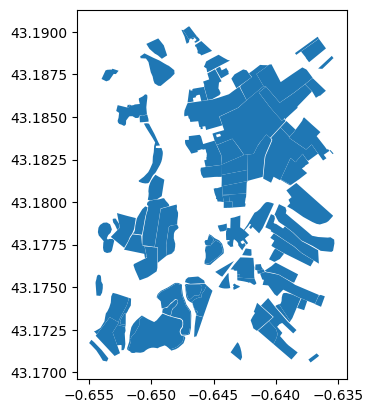

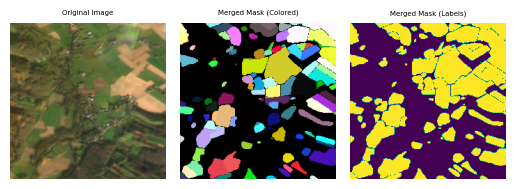

In [99]:
data.plot()
display_images_horizontally(images,titles)